# Visualizing Earnings Based on College Majors
---
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

### Prerequisite

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Line to make graphs appear
%matplotlib inline

In [2]:
#Importing the CSV file
recent_grads=pd.read_csv('recent-grads.csv')

In [3]:
#Showing the all of the dataframe's column and respective data type
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [4]:
#Showing the first 3 rows
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [5]:
#Descriptive stats of all column
recent_grads.describe(include="all")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,MISCELLANEOUS SOCIAL SCIENCES,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


### Dropping Missing Values

In [6]:
#Printing the original number of rows
print("Raw Data Count: ",recent_grads.shape[0])

Raw Data Count:  173


In [7]:
#Printing the updated number of rows
recent_grads=recent_grads.dropna()
print("Cleaned Data Count: ",recent_grads.shape[0])

Cleaned Data Count:  172


### Scatter Plotting

##### 1. Sample Size and Median Income

Text(0.5, 0, 'Sample Size')

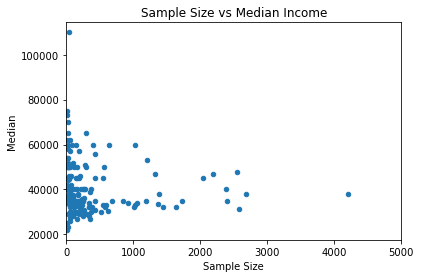

In [8]:
recent_grads.plot(x='Sample_size',y='Median',kind='scatter',
                 title='Sample Size vs Median Income',
                 xlim=(0,5000))
plt.xlabel('Sample Size')

##### 2. Sample Size and Unemployment Rate

Text(0.5, 0, 'Sample Size')

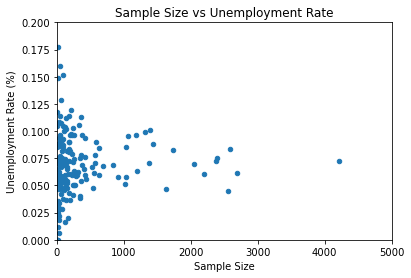

In [9]:
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',
                 title='Sample Size vs Unemployment Rate',
                 xlim=(0,5000),ylim=(0,0.2)) 
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Sample Size')

##### 3. Number of Full Time Employment and Median Income

Text(0.5, 0, 'n-Full Time Employment')

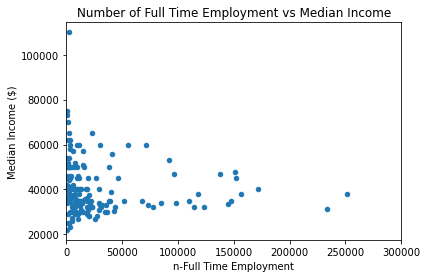

In [10]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter',
                 title='Number of Full Time Employment vs Median Income',
                 xlim=(0,300000))
plt.ylabel('Median Income ($)')
plt.xlabel('n-Full Time Employment')

##### 4. Women's Student Share and Unemployment Rate

Text(0.5, 0, 'Womens Share (%)')

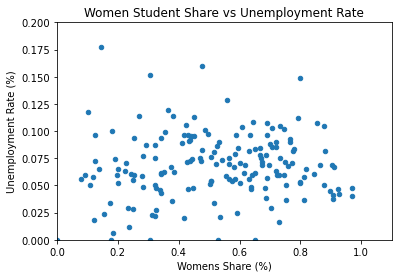

In [11]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',
                 title='Women Student Share vs Unemployment Rate',
                  xlim=(0,1.1),ylim=(0,0.2))
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Womens Share (%)')

##### 5. Number of Male Grads and Median Income

Text(0.5, 0, 'n-Male Grads')

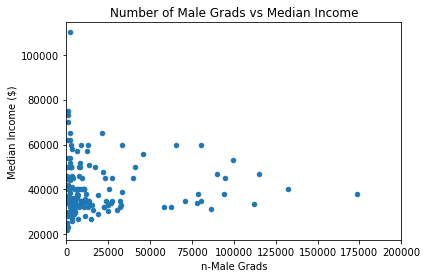

In [12]:
recent_grads.plot(x='Men',y='Median',kind='scatter',
                 title='Number of Male Grads vs Median Income',xlim=(0,200000))
plt.ylabel('Median Income ($)')
plt.xlabel('n-Male Grads')

##### 6. Number of Female Grads and Median Income 

Text(0.5, 0, 'n-Female Grads')

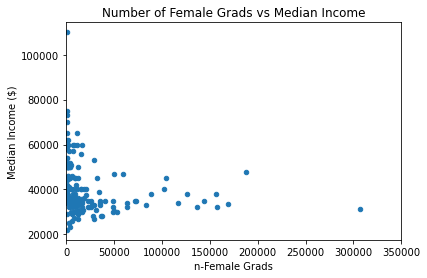

In [13]:
recent_grads.plot(x='Women',y='Median',kind='scatter',
                 title='Number of Female Grads vs Median Income',xlim=(0,350000))  
plt.ylabel('Median Income ($)')
plt.xlabel('n-Female Grads')

##### 7. Do Students in More Popular Majors Make More Money?

Text(0.5, 0, 'n-Grads')

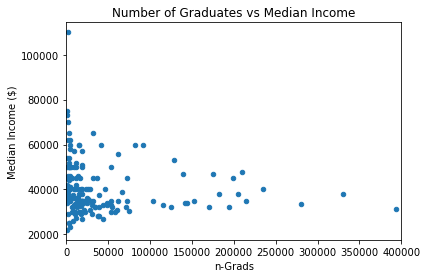

In [14]:
recent_grads.plot(x='Total',y='Median',kind='scatter',
                 title='Number of Graduates vs Median Income',
                 xlim=(0,400000))  
plt.ylabel('Median Income ($)')
plt.xlabel('n-Grads')

Based on the graph above which illustrates the relationship between the number of graduates of each major and its median income, it can be concluded that the increase of the numbers of graduates will have little to no effect in the median income. The graph indicates that the correlation between the two might be near near zero and since it is slanted downward, it is negatively correlated.

##### 8. Do Students That Majored in Subjects That Were Majority Female Make More Money?

Text(0.5, 0, 'Womens Share (%)')

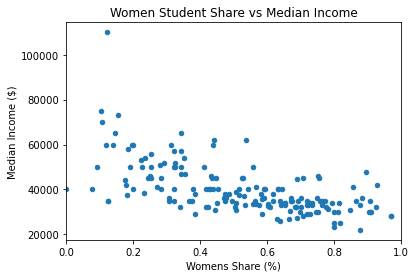

In [15]:
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter',
                 title='Women Student Share vs Median Income',
                  xlim=(0,1))
plt.ylabel('Median Income ($)')
plt.xlabel('Womens Share (%)')

It is not necessarily the case. The graphs indicate a weak negative correlation between Women Share Percentage and Median Income, therefore an increase in Women's Share Percantage will slightly decrease the Median Income.

##### 9. Is There Any Link Between The Number of Full-Time Employees and Median Salary?

Text(0, 0.5, 'Median Income ($)')

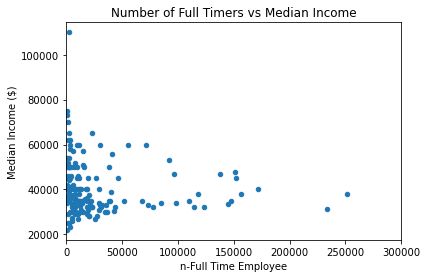

In [16]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter',
                  title='Number of Full Timers vs Median Income',
                 xlim=(0,300000))
plt.xlabel('n-Full Time Employee')
plt.ylabel('Median Income ($)')

The increase in number of full time employees for each major have little to no effect in the median income. The graph indicates that the correlation between the two might be near near zero and since it is slanted downward, it is negatively correlated. Other than 1 outlier major, the rest of the majors' median income ranges between 20,000 and 80,000 dollars.

### Histogram Plotting

##### 1. Sample Size

Text(0, 0.5, 'Frequency')

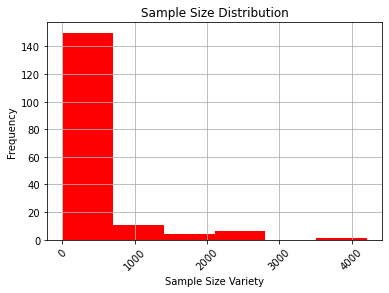

In [17]:
recent_grads['Sample_size'].hist(bins=6,color="red")
plt.title('Sample Size Distribution')
plt.xticks(rotation=45)
plt.xlabel('Sample Size Variety')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

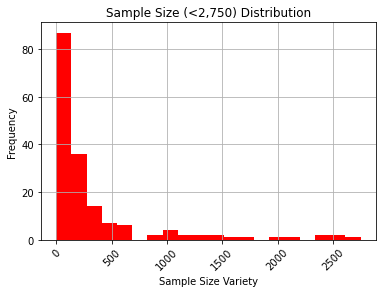

In [18]:
recent_grads['Sample_size'].hist(bins=20,range=(0,2750),color="red")
plt.title('Sample Size (<2,750) Distribution')
plt.xticks(rotation=45)
plt.xlabel('Sample Size Variety')
plt.ylabel('Frequency')

##### 2. Median Income

Text(0, 0.5, 'Frequency')

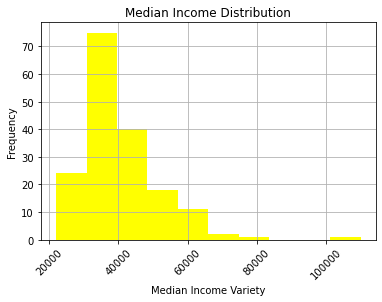

In [19]:
recent_grads['Median'].hist(bins=10,color='yellow')
plt.title('Median Income Distribution')
plt.xticks(rotation=45)
plt.xlabel('Median Income Variety')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

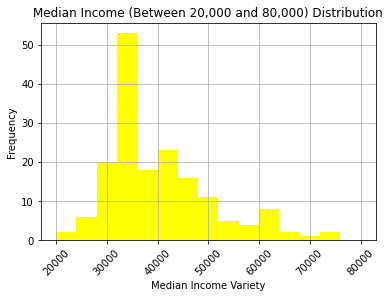

In [20]:
recent_grads['Median'].hist(bins=15,range=(20000,80000),color='yellow')
plt.title('Median Income (Between 20,000 and 80,000) Distribution')
plt.xticks(rotation=45)
plt.xlabel('Median Income Variety')
plt.ylabel('Frequency')

##### 3. Employed Graduates per Major Distribution

Text(0, 0.5, 'Frequency')

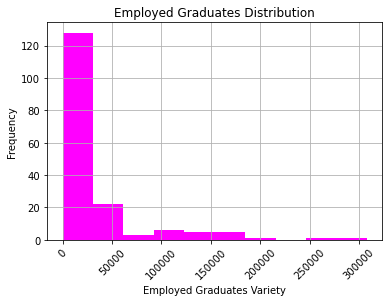

In [21]:
recent_grads['Employed'].hist(bins=10,color='magenta')
plt.title('Employed Graduates Distribution')
plt.xticks(rotation=45)
plt.xlabel('Employed Graduates Variety')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

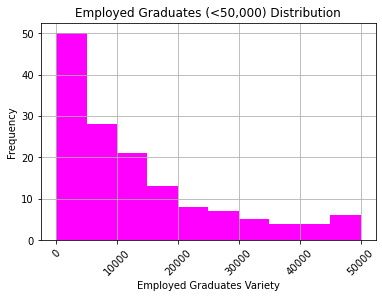

In [22]:
recent_grads['Employed'].hist(bins=10,range=(0,50000),color='magenta')
plt.title('Employed Graduates (<50,000) Distribution')
plt.xticks(rotation=45)
plt.xlabel('Employed Graduates Variety')
plt.ylabel('Frequency')

##### 4. Full Time Employees Distribution

Text(0, 0.5, 'Frequency')

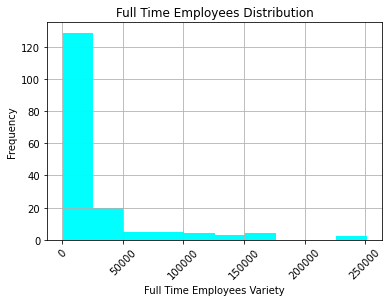

In [23]:
recent_grads['Full_time'].hist(bins=10,color='cyan')
plt.title('Full Time Employees Distribution')
plt.xticks(rotation=45)
plt.xlabel('Full Time Employees Variety')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

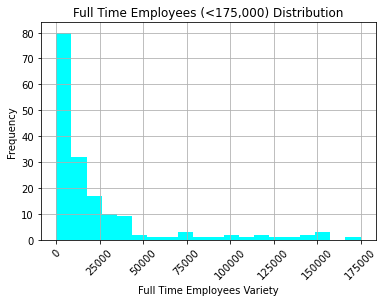

In [24]:
recent_grads['Full_time'].hist(bins=20,range=(0,175000),color='cyan')
plt.title('Full Time Employees (<175,000) Distribution')
plt.xticks(rotation=45)
plt.xlabel('Full Time Employees Variety')
plt.ylabel('Frequency')

##### 5. Women's Student Share Distribution

Text(0, 0.5, 'Frequency')

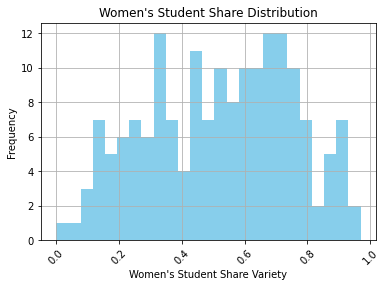

In [25]:
recent_grads['ShareWomen'].hist(bins=25,color='skyblue')
plt.title('Women\'s Student Share Distribution')
plt.xticks(rotation=45)
plt.xlabel('Women\'s Student Share Variety')
plt.ylabel('Frequency')

##### 6. Unemployment Rate Distribution

Text(0, 0.5, 'Frequency')

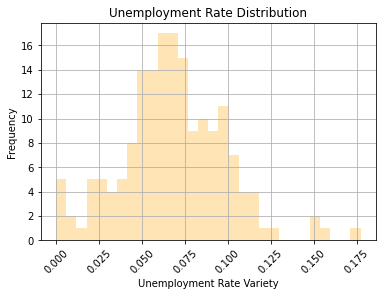

In [26]:
recent_grads['Unemployment_rate'].hist(bins=30,color='moccasin')
plt.title('Unemployment Rate Distribution')
plt.xticks(rotation=45)
plt.xlabel('Unemployment Rate Variety')
plt.ylabel('Frequency')

##### 7. Male Student's Distribution

Text(0, 0.5, 'Frequency')

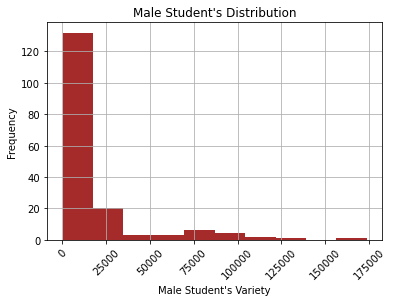

In [27]:
recent_grads['Men'].hist(bins=10,color='brown')
plt.title('Male Student\'s Distribution')
plt.xticks(rotation=45)
plt.xlabel('Male Student\'s Variety')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

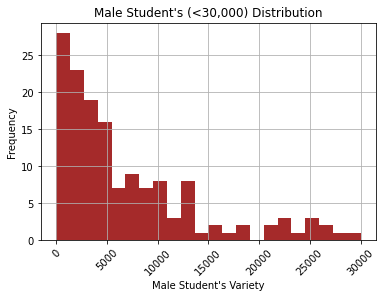

In [28]:
recent_grads['Men'].hist(bins=22,range=(0,3*10**4),color='brown')
plt.title('Male Student\'s (<30,000) Distribution')
plt.xticks(rotation=45)
plt.xlabel('Male Student\'s Variety')
plt.ylabel('Frequency')

##### 8. Female Student's Distribution

Text(0, 0.5, 'Frequency')

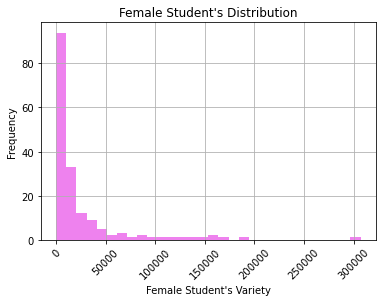

In [29]:
recent_grads['Women'].hist(bins=30,color='violet')
plt.title('Female Student\'s Distribution')
plt.xticks(rotation=45)
plt.xlabel('Female Student\'s Variety')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

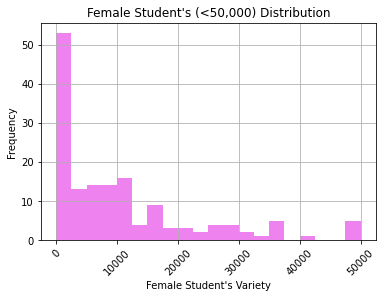

In [30]:
recent_grads['Women'].hist(bins=20,range=(0,5*10**4),color='violet')
plt.title('Female Student\'s (<50,000) Distribution')
plt.xticks(rotation=45)
plt.xlabel('Female Student\'s Variety')
plt.ylabel('Frequency')

### Scatter Matrices

In [31]:
#Importing the required module for scatter matrix
from pandas.plotting import scatter_matrix 

###### 1. Sample Size and Median Income Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236268031F0>,
      dtype=object)

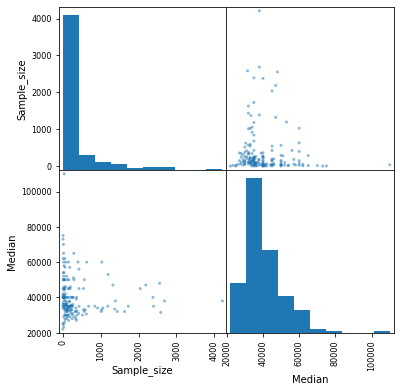

In [32]:
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(6,6))

##### 2. Sample Size, Median Income, and Unemployment Rate Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023626637550>,
      dtype=object)

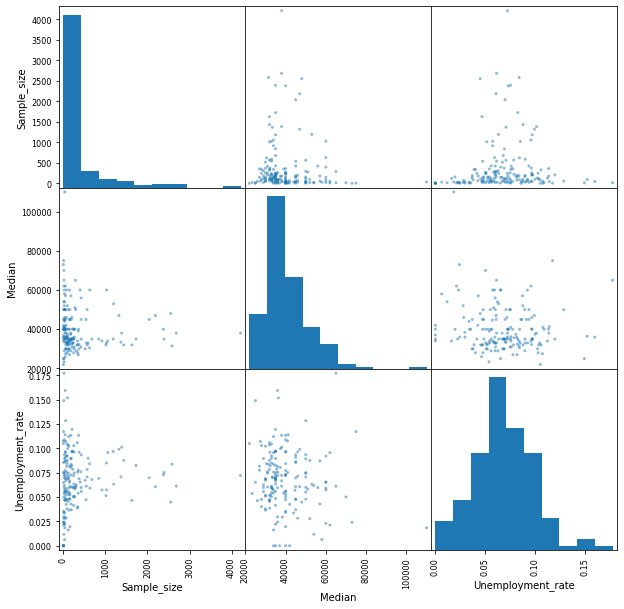

In [33]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))

##### 3. Total Number of Students in a Major and Median Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023626BDC370>,
      dtype=object)

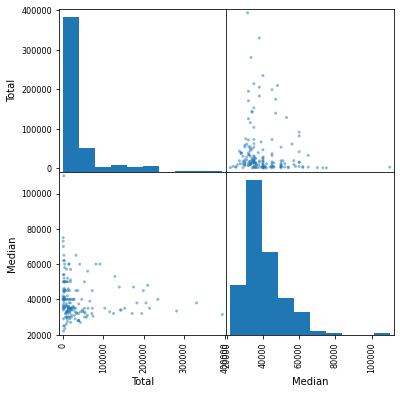

In [34]:
scatter_matrix(recent_grads[['Total','Median']],figsize=(6,6))

##### 4. Female Student's Share and Median Income Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023626C935B0>,
      dtype=object)

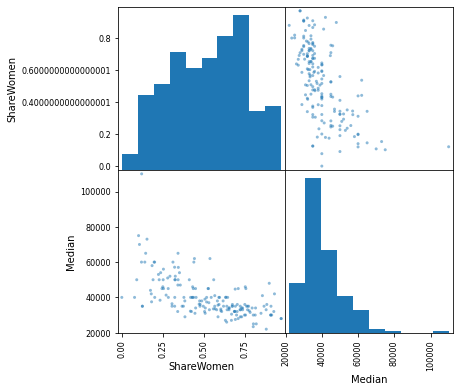

In [35]:
scatter_matrix(recent_grads[['ShareWomen','Median']],figsize=(6,6))

##### 5. Number of Full-time Employees and Median Income Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023627FE7E20>,
      dtype=object)

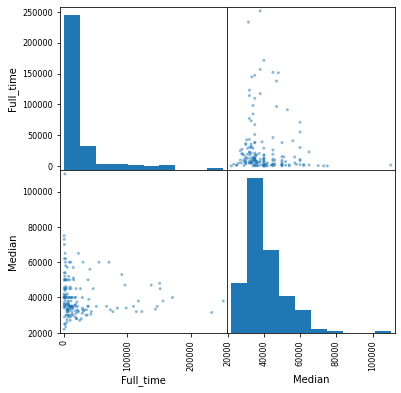

In [36]:
scatter_matrix(recent_grads[['Full_time','Median']],figsize=(6,6))

###### Comments:

Scatter Matrix 3,4,and 5 confirms the scatter plot analysis for number 7,8, and 9. Even if you swap the axis, you will still get the same conclusion which are:

    -There is a very-very weak (almost little to none) between the amount of people with major and median income.

    -There is a weak negative correlation between the proportion of female students in a major and median income.

    -There is a very-very weak (almost little to none) between full-time employees and median income.

### Bar Plot

##### 1. Female  Student's Share

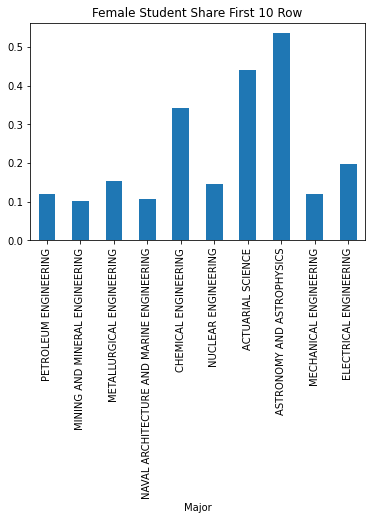

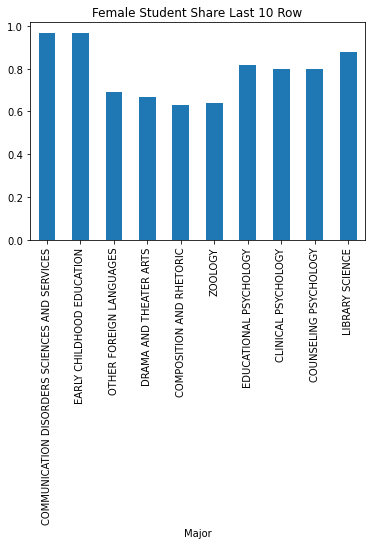

In [37]:
recent_grads[:10].plot.bar(x='Major',
                           y='ShareWomen',
                           title='Female Student Share First 10 Row',
                           legend=False)
recent_grads[(recent_grads['Major'].count())-10:].plot.bar(x='Major',
                                                           y='ShareWomen',
                                                           title='Female Student Share Last 10 Row',
                                                          legend=False)


##### 2. Unemployment Rate

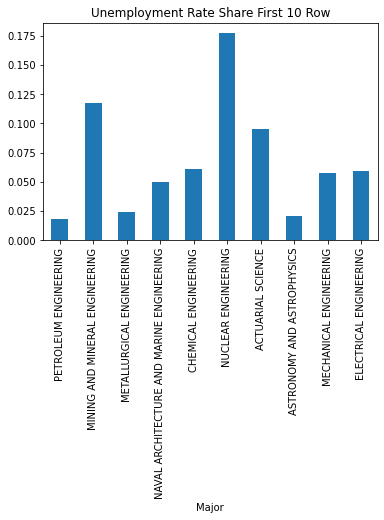

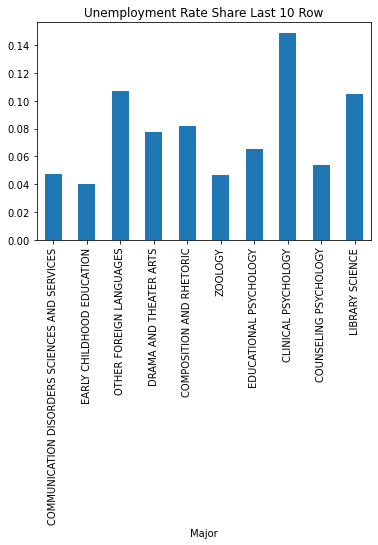

In [38]:
recent_grads[:10].plot.bar(x='Major',
                           y='Unemployment_rate',
                           title='Unemployment Rate Share First 10 Row',
                          legend=False)
recent_grads[(recent_grads['Major'].count())-10:].plot.bar(x='Major',
                                                           y='Unemployment_rate',
                                                           title='Unemployment Rate Share Last 10 Row',
                                                          legend=False)


### Random Bits

##### 1. Grouped Bar Plot n-Men and n-Women for Each Major Category

Text(0.5, 0, 'Category of Major')

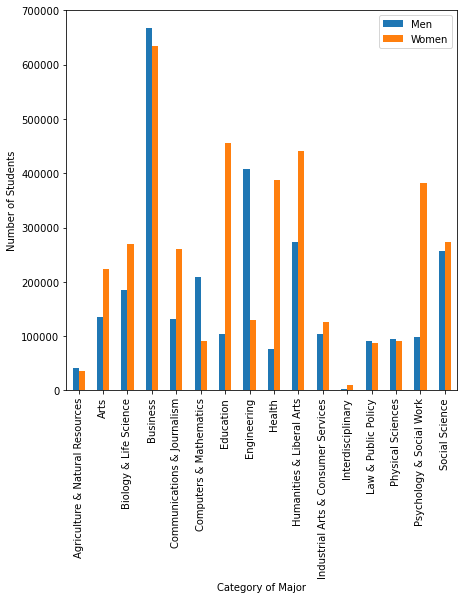

In [39]:
toplot=recent_grads[['Men','Women','Major_category']].groupby('Major_category').sum()
toplot.plot(kind='bar',figsize=(7,7))
plt.ylabel('Number of Students')
plt.xlabel('Category of Major')

##### 2. Box plot for Median and Unemployment Rate

Text(0, 0.5, 'Percentage')

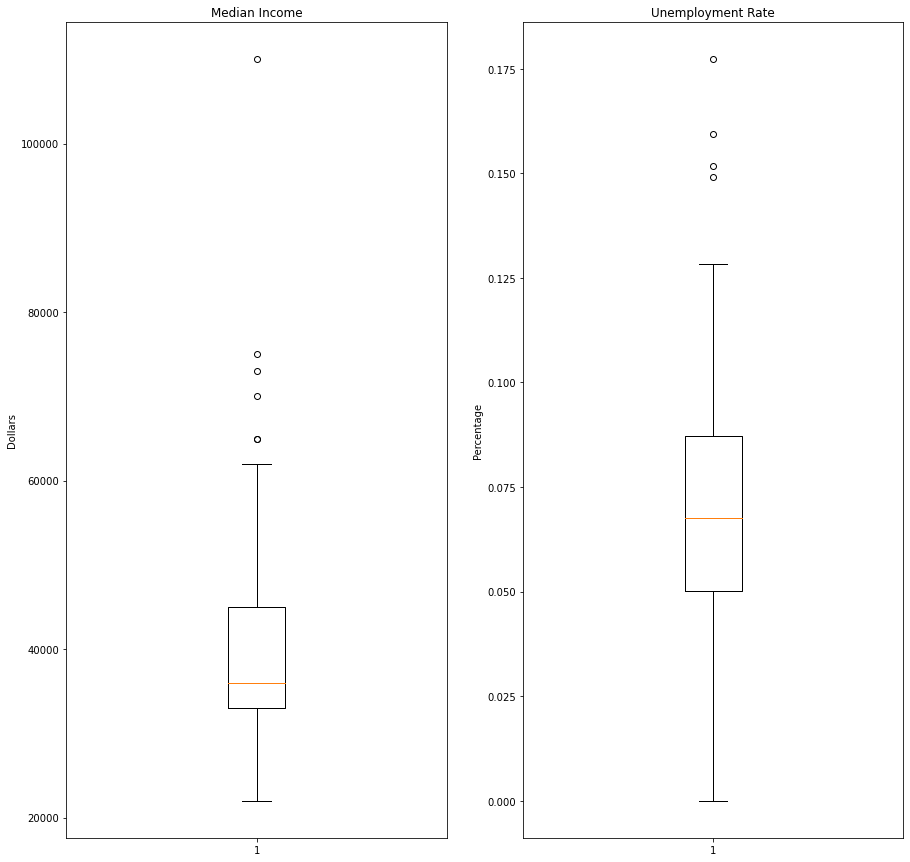

In [40]:
fig=plt.figure(figsize=(15,15))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.boxplot(recent_grads['Median'])
ax2.boxplot(recent_grads['Unemployment_rate'])

ax1.set_title("Median Income")
ax2.set_title('Unemployment Rate')

ax1.set_ylabel("Dollars")
ax2.set_ylabel("Percentage")

##### 3. Hexagonal Bin Plot

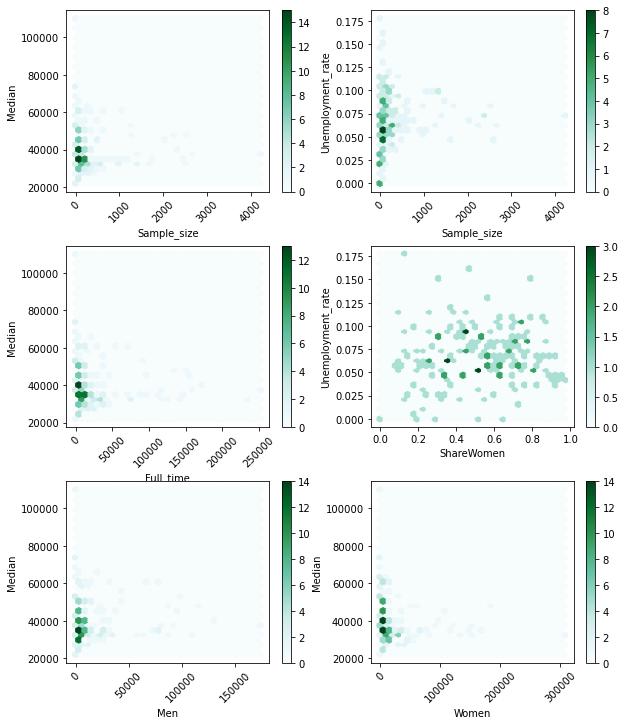

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,12))

plt.subplots_adjust(hspace=.3)

recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=30, ax=axs[0,0], rot=45)
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=30, ax=axs[0,1], rot=45)
recent_grads.plot.hexbin(x='Full_time', y='Median', gridsize=30, ax=axs[1,0], rot=45)
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate', gridsize=30, ax=axs[1,1])
recent_grads.plot.hexbin(x='Men', y='Median', gridsize=30, ax=axs[2,0], rot=45)
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=30, ax=axs[2,1], rot=45)